In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import mlflow

np.set_printoptions(precision=3, suppress=True)
tf.__version__

'2.4.1'

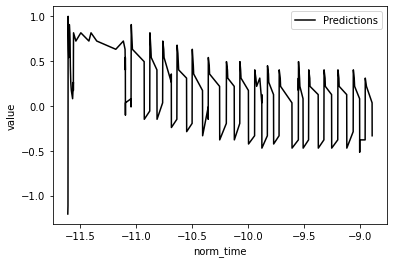

In [25]:
# Read dataset from file
raw_dataset = pd.read_csv("./data_grouped/1161114004_122_.csv")
raw_dataset = raw_dataset.astype({'id':'float','value':'float', 'station_id':'int', 'parameter_id':'int', 'unix_timestamp':'int', 'norm_time':'float'})
dataset = raw_dataset.copy()
dataset = dataset.dropna().drop(['id','station_id','parameter_id','unix_timestamp'], axis=1)
dataset_full = dataset.sort_values(by=['norm_time'])
dataset = dataset_full[0:300]

plt.plot(dataset['norm_time'], dataset['norm_value'], color='k', label='Predictions')
plt.xlabel('norm_time')
plt.ylabel('value')
plt.legend()
plt.show()

In [26]:
test_file_name = "./data_grouped/1161114002_122_.csv"
test_raw_dataset = pd.read_csv(test_file_name)
test_raw_dataset = test_raw_dataset.astype({'id':'float','value':'float', 'station_id':'int', 'parameter_id':'int', 'unix_timestamp':'int', 'norm_time':'float'})
test_dataset = test_raw_dataset.copy()
test_dataset = test_dataset.dropna().drop(['id','station_id','parameter_id','unix_timestamp'], axis=1)
test_dataset_full = test_dataset.sort_values(by=['norm_time'])
start_line = 0
end_line = 44
test_data = test_dataset_full[start_line:end_line]

In [27]:
serial_data = dataset.drop(['value','norm_time'], axis=1)
serial_data['norm_1'] = serial_data['norm_value'].shift(1)
serial_data['norm_2'] = serial_data['norm_value'].shift(2)
serial_data['norm_3'] = serial_data['norm_value'].shift(3)
serial_data['norm_4'] = serial_data['norm_value'].shift(4)
serial_data['norm_5'] = serial_data['norm_value'].shift(5)
serial_data['norm_6'] = serial_data['norm_value'].shift(6)
serial_data = serial_data[6:]
serial_data

,norm_value,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6
6,0.311370,0.632730,-0.055900,-0.423169,-0.790439,-1.111800,-1.203617
7,1.000000,0.311370,0.632730,-0.055900,-0.423169,-0.790439,-1.111800
8,0.908183,1.000000,0.311370,0.632730,-0.055900,-0.423169,-0.790439
9,0.816365,0.908183,1.000000,0.311370,0.632730,-0.055900,-0.423169
10,0.724548,0.816365,0.908183,1.000000,0.311370,0.632730,-0.055900
...,...,...,...,...,...,...,...
295,0.219552,0.311370,-0.009991,0.127735,-0.147717,-0.285443,-0.377261
296,0.035917,0.219552,0.311370,-0.009991,0.127735,-0.147717,-0.285443
297,-0.055900,0.035917,0.219552,0.311370,-0.009991,0.127735,-0.147717
298,-0.193626,-0.055900,0.035917,0.219552,0.311370,-0.009991,0.127735


In [28]:
test_serial_data = test_data.drop(['value','norm_time'], axis=1)
test_serial_data['norm_1'] = test_serial_data['norm_value'].shift(1)
test_serial_data['norm_2'] = test_serial_data['norm_value'].shift(2)
test_serial_data['norm_3'] = test_serial_data['norm_value'].shift(3)
test_serial_data['norm_4'] = test_serial_data['norm_value'].shift(4)
test_serial_data['norm_5'] = test_serial_data['norm_value'].shift(5)
test_serial_data['norm_6'] = test_serial_data['norm_value'].shift(6)
test_serial_data = test_serial_data[6:]
test_serial_data

,norm_value,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6
6,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597,-0.311759
7,-0.118853,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597
8,-0.196016,-0.118853,-0.003110,0.074052,-0.003110,-0.080272,-0.157435
9,-0.273178,-0.196016,-0.118853,-0.003110,0.074052,-0.003110,-0.080272
10,-0.350340,-0.273178,-0.196016,-0.118853,-0.003110,0.074052,-0.003110
11,-0.427503,-0.350340,-0.273178,-0.196016,-0.118853,-0.003110,0.074052
12,-0.311759,-0.427503,-0.350340,-0.273178,-0.196016,-0.118853,-0.003110
13,-0.234597,-0.311759,-0.427503,-0.350340,-0.273178,-0.196016,-0.118853
14,-0.157435,-0.234597,-0.311759,-0.427503,-0.350340,-0.273178,-0.196016
15,-0.080272,-0.157435,-0.234597,-0.311759,-0.427503,-0.350340,-0.273178


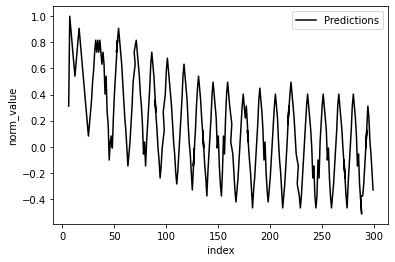

In [29]:
plt.plot(serial_data.index, serial_data['norm_value'], color='k', label='Predictions')
plt.xlabel('index')
plt.ylabel('norm_value')
plt.legend()
plt.show()

In [30]:
train_dataset = serial_data
test_dataset = test_serial_data

In [31]:
train_features = np.array(train_dataset.drop(['norm_value'], axis=1))
train_features = np.array(train_features)[:,:,np.newaxis]
train_features.shape

(294, 6, 1)

In [32]:
train_labels = np.array(train_dataset.drop(['norm_6'], axis=1))
train_labels = train_labels.reshape(train_labels.shape[0],train_labels.shape[1],1)
train_labels.shape

(294, 6, 1)

In [33]:
# train_labels

In [34]:
test_features = np.array(test_dataset.drop(['norm_value'], axis=1))
test_features = test_features.reshape(test_features.shape[0],test_features.shape[1],1)
test_features.shape

(38, 6, 1)

In [35]:
test_dataset.drop(['norm_value'], axis=1)

,norm_1,norm_2,norm_3,norm_4,norm_5,norm_6
6,0.074052,-0.003110,-0.080272,-0.157435,-0.234597,-0.311759
7,-0.003110,0.074052,-0.003110,-0.080272,-0.157435,-0.234597
8,-0.118853,-0.003110,0.074052,-0.003110,-0.080272,-0.157435
9,-0.196016,-0.118853,-0.003110,0.074052,-0.003110,-0.080272
10,-0.273178,-0.196016,-0.118853,-0.003110,0.074052,-0.003110
11,-0.350340,-0.273178,-0.196016,-0.118853,-0.003110,0.074052
12,-0.427503,-0.350340,-0.273178,-0.196016,-0.118853,-0.003110
13,-0.311759,-0.427503,-0.350340,-0.273178,-0.196016,-0.118853
14,-0.234597,-0.311759,-0.427503,-0.350340,-0.273178,-0.196016
15,-0.157435,-0.234597,-0.311759,-0.427503,-0.350340,-0.273178


In [36]:
np.array(test_dataset.drop(['norm_value'], axis=1))

array([[ 0.074, -0.003, -0.08 , -0.157, -0.235, -0.312],
       [-0.003,  0.074, -0.003, -0.08 , -0.157, -0.235],
       [-0.119, -0.003,  0.074, -0.003, -0.08 , -0.157],
       [-0.196, -0.119, -0.003,  0.074, -0.003, -0.08 ],
       [-0.273, -0.196, -0.119, -0.003,  0.074, -0.003],
       [-0.35 , -0.273, -0.196, -0.119, -0.003,  0.074],
       [-0.428, -0.35 , -0.273, -0.196, -0.119, -0.003],
       [-0.312, -0.428, -0.35 , -0.273, -0.196, -0.119],
       [-0.235, -0.312, -0.428, -0.35 , -0.273, -0.196],
       [-0.157, -0.235, -0.312, -0.428, -0.35 , -0.273],
       [-0.08 , -0.157, -0.235, -0.312, -0.428, -0.35 ],
       [-0.003, -0.08 , -0.157, -0.235, -0.312, -0.428],
       [ 0.074, -0.003, -0.08 , -0.157, -0.235, -0.312],
       [-0.003,  0.074, -0.003, -0.08 , -0.157, -0.235],
       [-0.08 , -0.003,  0.074, -0.003, -0.08 , -0.157],
       [-0.157, -0.08 , -0.003,  0.074, -0.003, -0.08 ],
       [-0.235, -0.157, -0.08 , -0.003,  0.074, -0.003],
       [-0.312, -0.235, -0.157,

In [37]:
test_labels = np.array(test_dataset.drop(['norm_6'], axis=1))
test_labels = test_labels.reshape(test_labels.shape[0],test_labels.shape[1],1)
test_labels.shape

(38, 6, 1)

In [38]:
model = keras.Sequential()
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(1)))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.005))
model.fit(train_features, train_labels, epochs=2, batch_size=1, verbose=2)


Epoch 1/2


KeyboardInterrupt: 

[-0.001  0.     0.001  0.002  0.002  0.003  0.004  0.003  0.002  0.001
  0.001  0.    -0.001  0.     0.001  0.001  0.002  0.003  0.003  0.004
  0.003  0.003  0.001  0.002  0.001  0.    -0.001  0.     0.001  0.001
  0.003  0.002  0.003  0.004  0.003  0.003  0.002  0.001] -0.00062411313
MSE 0.06330258651693033


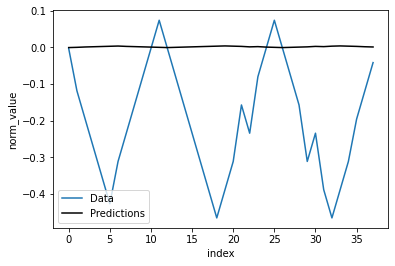

In [46]:

from sklearn.metrics import mean_squared_error

with mlflow.start_run():

    result = model.predict(test_features, batch_size=1, verbose=0)
    # print(result)
    x=pd.DataFrame(test_labels.reshape(test_labels.shape[0],test_labels.shape[1]))
    y=pd.DataFrame(result.reshape(result.shape[0],result.shape[1]))
    y_true = np.array(x[0])
    y_pred = np.array(y[0])

    print(y, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print("MSE", mse)
    
    mlflow.log_metric("MSE",mse)
    mlflow.log_param("test line from ", '{} {}'.format(start_line, end_line))
    mlflow.log_param("Test file", test_file_name)
    plt.plot(x.index, x[0], label='Data')
    plt.plot(y.index, y[0], color='k', label='Predictions')
    plt.xlabel('index')
    plt.ylabel('norm_value')
    plt.legend()
    plt.savefig("BTS_resultGraph.png")
    mlflow.log_artifact("BTS_resultGraph.png")
    plt.show()
    plt.close()

In [43]:
result = np.array([[-0.001],
 [-0.001],
 [-0.   ],
 [ 0.002],
 [ 0.004],
 [ 0.007]],[-0.001],
 [-0.001],
 [-0.   ],
 [ 0.002],
 [ 0.004],
 [ 0.007])
result.reshape(result.shape[0],result.shape[1])

TypeError: array() takes from 1 to 2 positional arguments but 7 were given

In [34]:
# => data line 200 den 250 lech => 800 den 850
# 950-1150